In [172]:
import pandas as pd
import numpy as np


In [173]:
# add header names
headers =  ['age', 'sex','chest_pain','resting_blood_pressure',  
        'serum_cholestoral', 'fasting_blood_sugar', 'resting_ecg_results',
        'max_heart_rate_achieved', 'exercise_induced_angina', 'oldpeak',"slope of the peak",
        'num_of_major_vessels','thal', 'heart_disease']

heart_df = pd.read_csv('heart.dat', sep=' ', names=headers)

In [174]:
heart_df.head()

,age,sex,chest_pain,resting_blood_pressure,serum_cholestoral,fasting_blood_sugar,resting_ecg_results,max_heart_rate_achieved,exercise_induced_angina,oldpeak,slope of the peak,num_of_major_vessels,thal,heart_disease
0,70.0,1.0,4.0,130.0,322.0,0.0,2.0,109.0,0.0,2.4,2.0,3.0,3.0,2
1,67.0,0.0,3.0,115.0,564.0,0.0,2.0,160.0,0.0,1.6,2.0,0.0,7.0,1
2,57.0,1.0,2.0,124.0,261.0,0.0,0.0,141.0,0.0,0.3,1.0,0.0,7.0,2
3,64.0,1.0,4.0,128.0,263.0,0.0,0.0,105.0,1.0,0.2,2.0,1.0,7.0,1
4,74.0,0.0,2.0,120.0,269.0,0.0,2.0,121.0,1.0,0.2,1.0,1.0,3.0,1


In [175]:
heart_df.shape

(270, 14)

In [176]:
heart_df.isna().sum()

age                        0
sex                        0
chest_pain                 0
resting_blood_pressure     0
serum_cholestoral          0
fasting_blood_sugar        0
resting_ecg_results        0
max_heart_rate_achieved    0
exercise_induced_angina    0
oldpeak                    0
slope of the peak          0
num_of_major_vessels       0
thal                       0
heart_disease              0
dtype: int64

In [177]:
heart_df.dtypes

age                        float64
sex                        float64
chest_pain                 float64
resting_blood_pressure     float64
serum_cholestoral          float64
fasting_blood_sugar        float64
resting_ecg_results        float64
max_heart_rate_achieved    float64
exercise_induced_angina    float64
oldpeak                    float64
slope of the peak          float64
num_of_major_vessels       float64
thal                       float64
heart_disease                int64
dtype: object

In [178]:
X = heart_df.drop(columns=['heart_disease'])

#replace target class with 0 and 1 
#1 means "have heart disease" and 0 means "do not have heart disease"
heart_df['heart_disease'] = heart_df['heart_disease'].replace(1, 0)
heart_df['heart_disease'] = heart_df['heart_disease'].replace(2, 1)

y = heart_df['heart_disease'].values.reshape(X.shape[0], 1)

In [179]:
X.head()

,age,sex,chest_pain,resting_blood_pressure,serum_cholestoral,fasting_blood_sugar,resting_ecg_results,max_heart_rate_achieved,exercise_induced_angina,oldpeak,slope of the peak,num_of_major_vessels,thal
0,70.0,1.0,4.0,130.0,322.0,0.0,2.0,109.0,0.0,2.4,2.0,3.0,3.0
1,67.0,0.0,3.0,115.0,564.0,0.0,2.0,160.0,0.0,1.6,2.0,0.0,7.0
2,57.0,1.0,2.0,124.0,261.0,0.0,0.0,141.0,0.0,0.3,1.0,0.0,7.0
3,64.0,1.0,4.0,128.0,263.0,0.0,0.0,105.0,1.0,0.2,2.0,1.0,7.0
4,74.0,0.0,2.0,120.0,269.0,0.0,2.0,121.0,1.0,0.2,1.0,1.0,3.0


Text(0, 0.5, 'Number of heart patient')

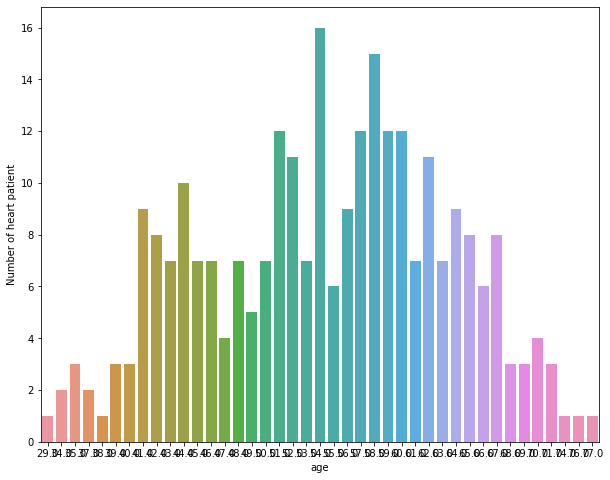

In [180]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline


plt.figure(figsize=(10,8))
sns.countplot(x='age', data=heart_df)
plt.xlabel("age")
plt.ylabel("Number of heart patient")


Text(0, 0.5, 'Number of heart patient')

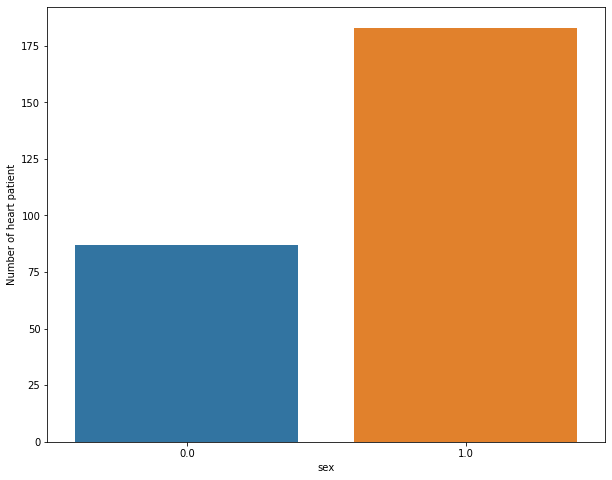

In [181]:
plt.figure(figsize=(10,8))
sns.countplot(x='sex', data=heart_df)
plt.xlabel("sex")
plt.ylabel("Number of heart patient")

In [182]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

#split data into train and test set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [183]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers

# Initialising the ANN
classifier = Sequential()

classifier.add(Dense(12, activation='relu'))
classifier.add(Dense(8,activation='relu'))
classifier.add(Dense(1, activation='sigmoid'))

# compile the keras model
classifier.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [185]:
# fit the keras model on the dataset
classifier.fit(X_train, y_train)

Train on 216 samples
216/216 [==============================] - 4s 20ms/sample - loss: 0.6747 - accuracy: 0.5463


In [190]:
# evaluate the keras model
accuracy = classifier.evaluate(X_train, y_train)
print(accuracy*100)

216/1 [=================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

In [191]:
classifier.fit(X_train, y_train,validation_split=0.33, batch_size = 10, nb_epoch = 100)

Train on 144 samples, validate on 72 samples
Epoch 1/100
144/144 [==============================] - 0s 347us/sample - loss: 0.6506 - accuracy: 0.5972 - val_loss: 0.6259 - val_accuracy: 0.6944
Epoch 2/100
144/144 [==============================] - 0s 340us/sample - loss: 0.6232 - accuracy: 0.6667 - val_loss: 0.5951 - val_accuracy: 0.8194
Epoch 3/100
144/144 [==============================] - 0s 319us/sample - loss: 0.5997 - accuracy: 0.7083 - val_loss: 0.5679 - val_accuracy: 0.8333
Epoch 4/100
144/144 [==============================] - 0s 306us/sample - loss: 0.5776 - accuracy: 0.7639 - val_loss: 0.5429 - val_accuracy: 0.8611
Epoch 5/100
144/144 [==============================] - 0s 417us/sample - loss: 0.5565 - accuracy: 0.7847 - val_loss: 0.5175 - val_accuracy: 0.8889
Epoch 6/100
144/144 [==============================] - 0s 368us/sample - loss: 0.5351 - accuracy: 0.7917 - val_loss: 0.4923 - val_accuracy: 0.9028
Epoch 7/100
144/144 [==============================] - 0s 333us/sample - 

144/144 [==============================] - 0s 354us/sample - loss: 0.2388 - accuracy: 0.9097 - val_loss: 0.2968 - val_accuracy: 0.9028
Epoch 56/100
144/144 [==============================] - 0s 333us/sample - loss: 0.2359 - accuracy: 0.9097 - val_loss: 0.2983 - val_accuracy: 0.9028
Epoch 57/100
144/144 [==============================] - 0s 319us/sample - loss: 0.2338 - accuracy: 0.9097 - val_loss: 0.2989 - val_accuracy: 0.9028
Epoch 58/100
144/144 [==============================] - 0s 306us/sample - loss: 0.2312 - accuracy: 0.9097 - val_loss: 0.3005 - val_accuracy: 0.9028
Epoch 59/100
144/144 [==============================] - 0s 340us/sample - loss: 0.2292 - accuracy: 0.9097 - val_loss: 0.3015 - val_accuracy: 0.9028
Epoch 60/100
144/144 [==============================] - 0s 319us/sample - loss: 0.2272 - accuracy: 0.9097 - val_loss: 0.3019 - val_accuracy: 0.9028
Epoch 61/100
144/144 [==============================] - 0s 313us/sample - loss: 0.2255 - accuracy: 0.9097 - val_loss: 0.3031 

In [193]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

# Calculate the Accuracy
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred,y_test)
print(score)

0.7407407407407407
